In [138]:
!pip install tensorflow

In [139]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [140]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [141]:
X_train.shape


(50000, 32, 32, 3)

In [142]:
X_test.shape

(10000, 32, 32, 3)

In [143]:
y_train.shape

(50000, 1)

In [144]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [145]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [146]:
y_test = y_test.reshape(-1,)

In [147]:
classes = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]

In [148]:
print(classes[0])
print(classes[1])
print(classes[2])
print(classes[3])
print(classes[4])
print(classes[5])
print(classes[6])
print(classes[7])
print(classes[8])
print(classes[9])

Airplane
Automobile
Bird
Cat
Deer
Dog
Frog
Horse
Ship
Truck


In [149]:
def plot_sample(X, y, i):
    plt.figure(figsize = (15,2))
    plt.imshow(X[i])
    plt.xlabel(classes[y[i]])

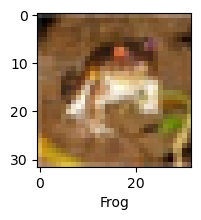

In [150]:
plot_sample(X_train, y_train, )

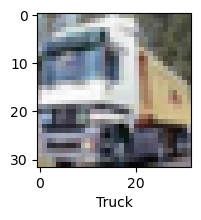

In [151]:
plot_sample(X_train, y_train, 1)

In [152]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [153]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\sakth\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.2990 - loss: 1.9347
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.4197 - loss: 1.6455
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.4529 - loss: 1.5587
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.4746 - loss: 1.4954
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.4923 - loss: 1.4451


In [190]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report:", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
Classification Report:               precision    recall  f1-score   support

           0       0.72      0.32      0.44      1000
           1       0.43      0.76      0.55      1000
           2       0.50      0.11      0.18      1000
           3       0.43      0.23      0.30      1000
           4       0.35      0.55      0.43      1000
           5       0.44      0.33      0.37      1000
           6       0.54      0.46      0.50      1000
           7       0.42      0.69      0.52      1000
           8       0.41      0.79      0.54      1000
           9       0.70      0.21      0.32      1000

    accuracy                           0.44     10000
   macro avg       0.49      0.44      0.42     10000
weighted avg       0.49      0.44      0.42     10000



In [155]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\sakth\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [156]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [157]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.3946 - loss: 1.6641
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6049 - loss: 1.1319
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6591 - loss: 0.9871
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6936 - loss: 0.8873
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7205 - loss: 0.8089
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7400 - loss: 0.7519
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7586 - loss: 0.6977
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7747 - loss: 0.6466
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7939 - loss: 0.5957
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8108 - loss: 0.5500


In [158]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7030 - loss: 0.9179


[0.9297705888748169, 0.7046999931335449]

In [159]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[1.91930376e-04, 2.78773805e-04, 2.94768761e-05, 9.89783704e-01,
        1.39151680e-05, 7.25583918e-03, 1.36154902e-03, 1.74409506e-05,
        9.23864834e-04, 1.43476369e-04],
       [7.53495377e-04, 9.48888958e-02, 1.11831646e-08, 2.50380801e-08,
        1.44127210e-09, 4.98488528e-10, 1.16540932e-09, 3.90713295e-10,
        9.03804481e-01, 5.53056016e-04],
       [5.44197625e-03, 2.24517193e-02, 4.35385919e-05, 3.13973025e-04,
        1.02046186e-04, 6.51666778e-06, 6.31723451e-05, 3.11016105e-04,
        9.52278912e-01, 1.89871825e-02],
       [3.35764915e-01, 1.00188458e-03, 2.69298023e-03, 2.05725635e-04,
        4.85427619e-04, 3.85878684e-06, 5.51880794e-06, 1.11826455e-04,
        6.59647822e-01, 8.01300848e-05],
       [1.73154240e-06, 4.02016713e-06, 3.85033153e-02, 2.65213773e-02,
        1.93920791e-01, 1.08282338e-03, 7.39954948e-01, 8.70601980e-07,
        7.85678913e-06, 2.29743250e-06]], dtype=float32)

In [160]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [161]:
y_test[:6]

array([3, 8, 8, 0, 6, 6], dtype=uint8)

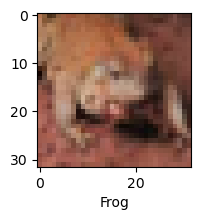

In [162]:
plot_sample(X_test, y_test,5)

In [163]:
classes[y_classes[5]]

'Frog'